In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
# Загрука изображения
image_path = 'sar_1.jpg'
image = cv2.imread(image_path)

In [3]:
if image is None:
    raise FileNotFoundError(f"Изображение {image_path} не найдено!")

In [4]:
image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

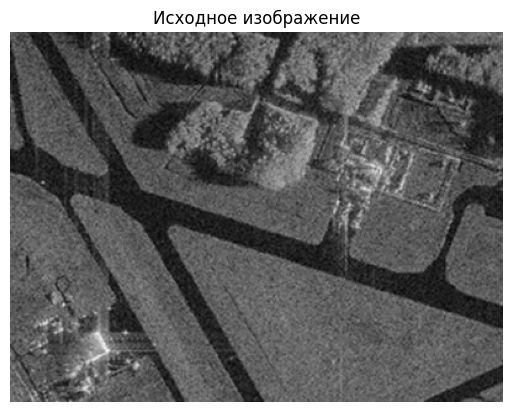

In [5]:
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

In [6]:
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])

    if abs(av_val - img[point]) <= T:
        return True

    return False

In [7]:
def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r: j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask

    return mask * 255

In [8]:
seed_point = (250, 250)
mask = region_growing(image_gray, seed_point, homo_average, 5, 25)

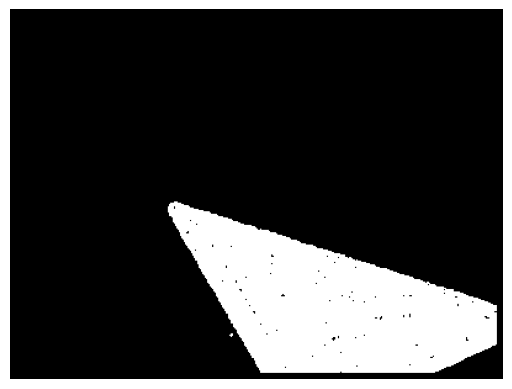

In [9]:
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
# Подсчет критерия однородности через среднее значение
def homo_mean(img, mask, point, T):
    mean = img[mask >  0].mean()
    return abs(mean - img[point]) <= T

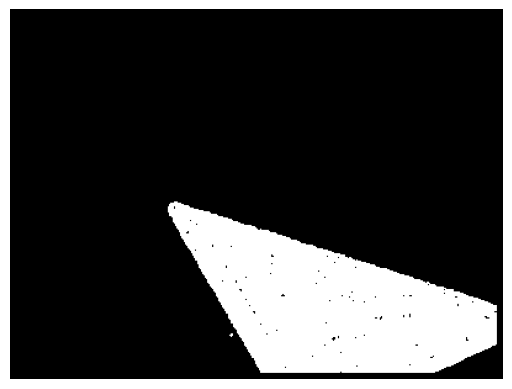

In [11]:
new_mask = region_growing(image_gray,seed_point,homo_mean,5, 25)
plt.imshow(new_mask, cmap='gray')
plt.axis('off')
plt.show()

Подсчет количества пальм

In [12]:
# Загрука изображения
image_path = 'palm_1.JPG'
image_palm = cv2.imread(image_path)

In [13]:
if image_palm is None:
    raise FileNotFoundError(f"Изображение {image_path} не найдено!")

In [14]:
image_palm_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

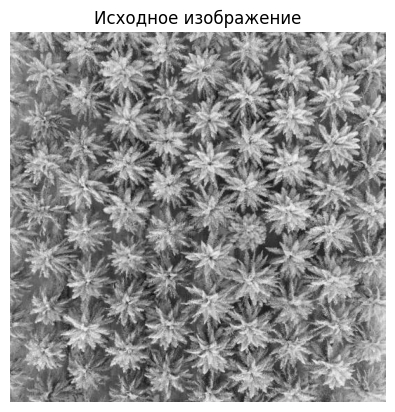

In [15]:
plt.imshow(image_palm_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.show()

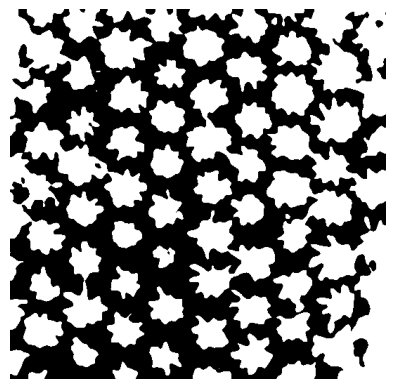

In [16]:
blur = cv2.GaussianBlur(image_palm_gray, (21, 21), 0)
ret, thresh = cv2.threshold(blur,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

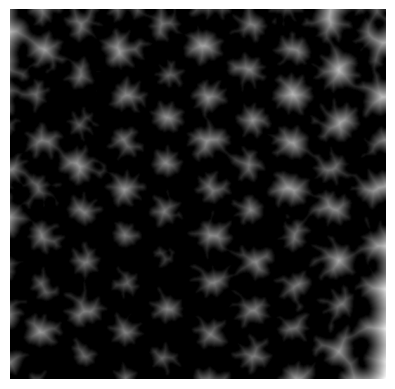

In [17]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plt.imshow(dist, cmap='gray')
plt.axis('off')
plt.show()

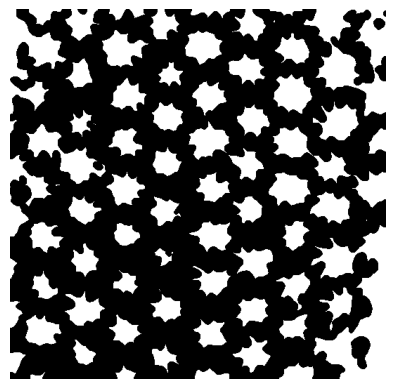

In [18]:
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')
plt.show()

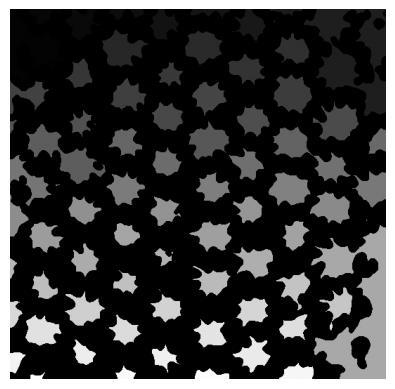

In [19]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap='gray')
plt.axis('off')
plt.show()

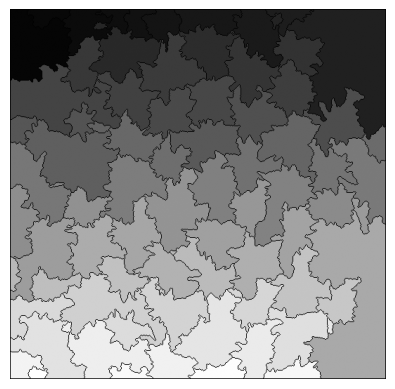

In [20]:
markers = cv2.watershed(image_palm, markers)
plt.imshow(markers, cmap='gray')
plt.axis('off')
plt.show()

In [21]:
count = len(np.unique(markers))
print(f'Найдено {count} пальм (примерное количество)')

Найдено 85 пальм (примерное количество)
